In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
df=pd.read_csv("F:\DataTrained project datasets\project dynamic m20/csse_covid_19_daily_reports_us.txt")

In [3]:
df.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [ ]:
df["Country_Region"].value_counts()

In [7]:
df.shape

(58, 18)

In [10]:
#dropping columns thats ate of no use 
df1=df.drop(["Country_Region","Last_Update","Lat","Long_","UID"],axis=1)


In [11]:
df1.head(3)

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.43886
1,Alaska,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN


In [12]:
df1.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [18]:
df1["Recovered"].fillna(df1["Recovered"].mean(),inplace=True)
    

In [19]:
df1["Incident_Rate"].fillna(df1["Incident_Rate"].mean(),inplace=True)

In [20]:
df1["People_Tested"].fillna(df1["People_Tested"].mean(),inplace=True)

In [22]:
df1["People_Hospitalized"].fillna(df1["People_Hospitalized"].mean(),inplace=True)

In [23]:
df1["Mortality_Rate"].fillna(df1["Mortality_Rate"].mean(),inplace=True)

In [24]:
df1["Testing_Rate"].fillna(df1["Testing_Rate"].mean(),inplace=True)

In [26]:
df1["Hospitalization_Rate"].fillna(df1["Hospitalization_Rate"].mean(),inplace=True)

In [27]:
df1.isnull().sum()

Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

hence we have removed the nan values using mean 

In [28]:
df1.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,3894.186870,14.342541
std,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,1898.951207,3.781861
min,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,2741.843521,12.829963
50%,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,3501.526835,14.342541
75%,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,4622.586404,15.552021
max,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Confirmed             58 non-null     int64  
 2   Deaths                58 non-null     int64  
 3   Recovered             58 non-null     float64
 4   Active                58 non-null     float64
 5   FIPS                  58 non-null     int64  
 6   Incident_Rate         58 non-null     float64
 7   People_Tested         58 non-null     float64
 8   People_Hospitalized   58 non-null     float64
 9   Mortality_Rate        58 non-null     float64
 10  ISO3                  58 non-null     object 
 11  Testing_Rate          58 non-null     float64
 12  Hospitalization_Rate  58 non-null     float64
dtypes: float64(8), int64(3), object(2)
memory usage: 6.0+ KB


In [31]:
df1["Province_State"].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [32]:
df1["ISO3"].unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

In [34]:
df1["Province_State"].value_counts()

Grand Princess              1
District of Columbia        1
South Dakota                1
Nebraska                    1
Oklahoma                    1
New Hampshire               1
Nevada                      1
Tennessee                   1
Connecticut                 1
North Dakota                1
Virginia                    1
West Virginia               1
New Jersey                  1
North Carolina              1
California                  1
Wisconsin                   1
Puerto Rico                 1
Wyoming                     1
Utah                        1
American Samoa              1
Virgin Islands              1
Indiana                     1
Arizona                     1
Minnesota                   1
Michigan                    1
New York                    1
Texas                       1
Georgia                     1
Ohio                        1
Pennsylvania                1
Colorado                    1
Rhode Island                1
Northern Mariana Islands    1
Mississipp

In [36]:
df1["ISO3"].value_counts()

USA    53
PRI     1
MNP     1
GUM     1
ASM     1
VIR     1
Name: ISO3, dtype: int64

In [37]:
df1.head(2)

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,USA,5063.940017,14.342541


In [39]:
df1.shape

(58, 13)

Confirmed                  AxesSubplot(0.125,0.657941;0.0945122x0.222059)
Deaths                  AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Recovered               AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Active                  AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
FIPS                    AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
Incident_Rate           AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
People_Tested           AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
People_Hospitalized        AxesSubplot(0.125,0.391471;0.0945122x0.222059)
Mortality_Rate          AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
Testing_Rate            AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
Hospitalization_Rate    AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
dtype: object

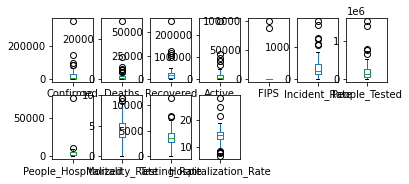

In [41]:
df1.plot(kind="box",subplots=True,layout=(3,7))

In [42]:
from scipy.stats import zscore

In [45]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

In [48]:
list=["Province_State","ISO3"]
for val in list:
    df1[val]=le.fit_transform(df1[val].astype(str))

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     int32  
 1   Confirmed             58 non-null     int64  
 2   Deaths                58 non-null     int64  
 3   Recovered             58 non-null     float64
 4   Active                58 non-null     float64
 5   FIPS                  58 non-null     int64  
 6   Incident_Rate         58 non-null     float64
 7   People_Tested         58 non-null     float64
 8   People_Hospitalized   58 non-null     float64
 9   Mortality_Rate        58 non-null     float64
 10  ISO3                  58 non-null     int32  
 11  Testing_Rate          58 non-null     float64
 12  Hospitalization_Rate  58 non-null     float64
dtypes: float64(8), int32(2), int64(3)
memory usage: 5.6 KB


In [57]:
z=np.abs(zscore(df1))
thresold=3
df2=df1[(z<3).all(axis=1)]

In [51]:
df2.shape

(49, 13)

In [52]:
percentage_loss=(58-49)/58*100

In [53]:
percentage_loss

15.517241379310345

alot of data is being lost so we will not remove outliers and we will keep our df1 for further process

In [138]:
df1.skew()

Province_State          0.000000
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [139]:
import warnings 
warnings.simplefilter("ignore")

in some of the column large skewness is present so we will remove those

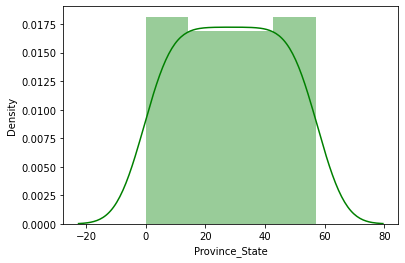

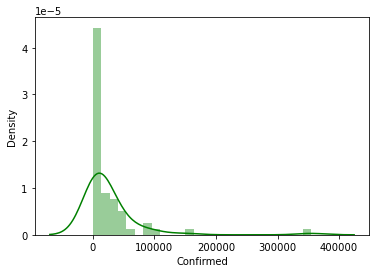

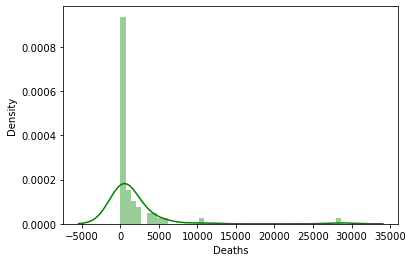

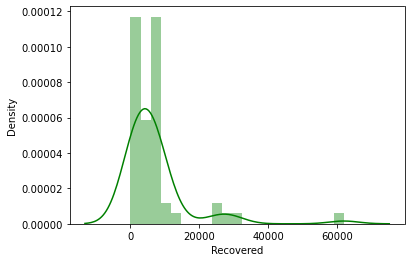

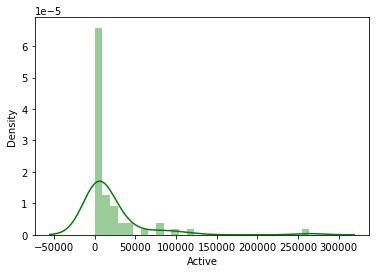

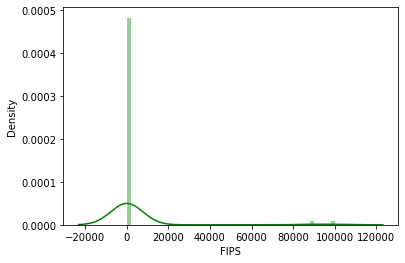

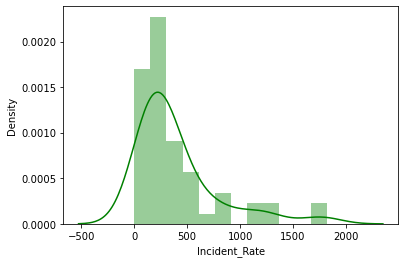

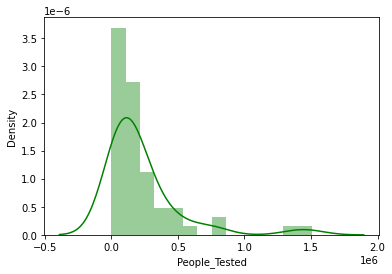

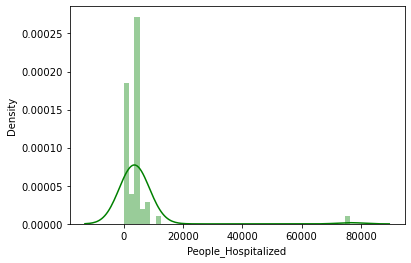

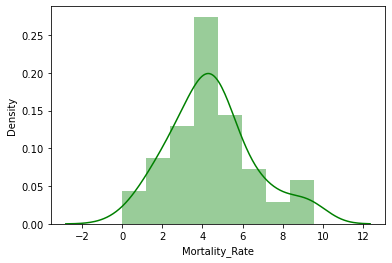

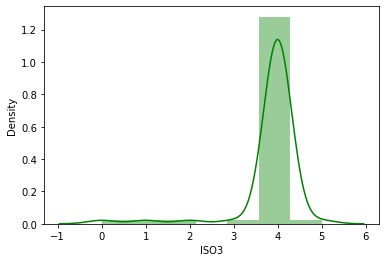

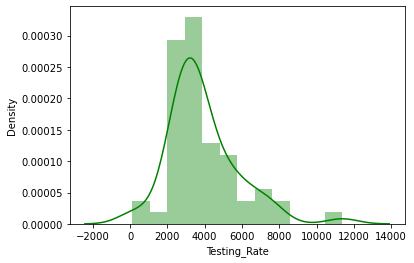

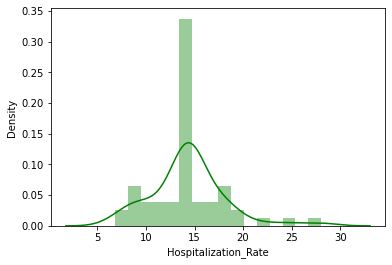

In [140]:
for col in df1.describe().columns:
    sns.distplot(df1[col],color="g")
    plt.show()

In [143]:
for col in df1.skew().index:
    if col in df1.describe().columns:
        if df1[col].skew()>0.55:
            df1[col]=np.sqrt(df1[col])
        if df1[col].skew()<-0.55:
            df1[col]=np.cbrt(df1[col])

In [144]:
df1.skew()

Province_State          0.000000
Confirmed               0.350418
Deaths                 -3.826627
Recovered               0.203871
Active                  0.453740
FIPS                    4.501584
Incident_Rate          -0.449887
People_Tested           0.030727
People_Hospitalized    -0.302655
Mortality_Rate          0.496115
ISO3                   -6.110356
Testing_Rate           -0.261124
Hospitalization_Rate    0.211792
dtype: float64

hence we have removed the skewness

In [145]:
df1.isnull().sum()

Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [146]:
heat_corr=df1.corr()

<AxesSubplot:>

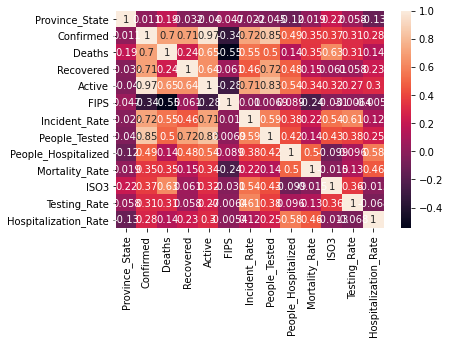

In [147]:
sns.heatmap(heat_corr,annot=True)

death column is positively correlated with ISO3,pepole_tested,Incident_rate,active and confirmed 
these columns have positive 50% and above correlation with deth column

recovered column is positively correlated with people_hospitalized,people_tested,active ,confirmed and incident_rate

In [ ]:
#we have to identify death and recovered cases hence we have 
#two dependent variables 
# 1) death
#2) recovered cases 

In [148]:
df1.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,0,10.688562,1.297885,9.149338,10.580051,1.000000,4.039240,20.137635,2.493202,3.999387,1.587401,57.913232,3.382138
1,1,4.474928,1.100694,4.331474,2.498999,1.090508,2.720983,13.873384,2.892320,2.493766,1.587401,71.161366,3.787155
2,2,0.000000,0.000000,9.149338,0.000000,1.668280,0.000000,3.336994,2.892320,4.458248,0.000000,14.928404,3.787155
3,3,11.049440,1.317412,7.837394,10.095134,1.189207,3.782915,20.167722,2.550746,5.011405,1.587401,47.674515,3.467276
4,4,8.410225,1.214948,7.878101,5.684276,1.222845,3.588268,17.614049,2.193028,2.138717,1.587401,56.477167,3.270105


In [149]:
x=df1.drop("Deaths",axis=1)

In [150]:
y=df1["Deaths"]

In [151]:
x.shape

(58, 12)

y.shape

In [152]:
y.shape

(58,)

In [153]:
x1=df1.drop("Recovered",axis=1)

In [154]:
y1=df1["Recovered"]

In [156]:
x1.shape

(58, 12)

In [157]:
y1.shape

(58,)

In [158]:
from sklearn.preprocessing import StandardScaler
        

In [159]:
sc=StandardScaler()

In [161]:
scaled_x=sc.fit_transform(x)

In [162]:
scaled_x1=sc.fit_transform(x1)

In [163]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [164]:
from sklearn.model_selection import GridSearchCV

c

c

In [169]:
parameters={"random_state":range(42,200)}

In [170]:
lm=LinearRegression()

In [171]:
regressor=GridSearchCV(lm,parameters)

In [174]:
regressor.fit(x,y)

ValueError: Invalid parameter random_state for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.


why i m not able to apply grid search here.

In [176]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

In [178]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((46, 12), (12, 12), (46,), (12,))

In [179]:
lm.fit(x_train,y_train)

LinearRegression()

In [180]:
pred=lm.predict(x_test)

In [181]:
pred

array([1.31266337, 1.46778086, 1.48183182, 0.06754403, 0.99338299,
       1.26534087, 1.28091989, 1.47531591, 1.27512371, 1.32760416,
       1.25926131, 1.33698107])

In [182]:
print("Predicted values:",pred)
print("Actual Values:",y_test)

Predicted values: [1.31266337 1.46778086 1.48183182 0.06754403 0.99338299 1.26534087
 1.28091989 1.47531591 1.27512371 1.32760416 1.25926131 1.33698107]
Actual Values: 0     1.297885
5     1.404928
34    1.472223
13    1.046839
44    1.222845
52    1.077514
37    1.315848
25    1.437543
46    1.284497
12    1.363233
48    1.269149
3     1.317412
Name: Deaths, dtype: float64


In [183]:
lm.score(x_train,y_train)

0.9660942875933616

In [184]:
lm.coef_

array([ 0.05771711,  0.14696093, -0.07922189, -0.13269474, -0.20591521,
        0.08739249,  0.10013565,  0.00717535,  0.03548041,  0.06318671,
       -0.04260153, -0.00108074])

In [185]:
lm.intercept_

1.2154688593664447

In [186]:
print("Error:")
print("Mean Absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean Absolute error: 0.1359152056057242
Mean squared error: 0.08797473423744628
root mean squared error 0.29660535099260477


it seems our model is performing well

In [187]:
from sklearn.metrics import r2_score

In [188]:
print(r2_score(y_test,pred))

-4.731092039591834


lm.score(x_test,y_test)

In [189]:
lm.score(x_test,y_test)

-4.731092039591834

In [190]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x1,y1,test_size=0.2,random_state=42)

In [191]:
lm.fit(x_train,y_train)

LinearRegression()

In [192]:
pred=lm.predict(x_test)

In [193]:
pred

array([ 7.48119405, 11.72675766, 12.19663299,  1.07872174,  3.9456587 ,
        4.28308568, 10.1362018 , 10.41411812,  8.51435942,  8.65699435,
       10.53110439,  8.01354283])

In [194]:
print("Predicted values:",pred)
print("Actual Values:",y_test)

Predicted values: [ 7.48119405 11.72675766 12.19663299  1.07872174  3.9456587   4.28308568
 10.1362018  10.41411812  8.51435942  8.65699435 10.53110439  8.01354283]
Actual Values: 0      9.149338
5      9.149338
34    12.439523
13     9.149338
44     9.149338
52     2.794682
37    10.386286
25     9.149338
46     8.592490
12     9.149338
48    10.418710
3      7.837394
Name: Recovered, dtype: float64


In [195]:
print("Error:")
print("Mean Absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean Absolute error: 1.8020860490987631
Mean squared error: 8.822303181739368
root mean squared error 2.970236216488407


In [196]:
lm.score(x_train,y_train)

0.9011898203749311

In [197]:
lm.score(x_test,y_test)

-0.8942568299622904

In [198]:
import pickle

In [199]:
filename="covid19.pkl"
pickle.dump(lm,open(filename,"wb"))